<a href="https://colab.research.google.com/github/scalabrinig/cdProjetoAplicadoIV/blob/master/projeto/cd_projeto_aplicado_IV_entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/joaonetto/projetoAplicado-IV/refs/heads/main/Images/Mackenzie.png" width="25%" align="left"/>

# **PROJETO APLICADO IV - Ciência de Dados EaD - 2026/01**


# **Entrega 3**

---

# **Titulo do Projeto**:

### ***ChronoSec***: Detecção Comportamental e Séries Temporais para Segurança de Login (UEBA) em Eventos Google
---

**Projeto**: *User Behaviour Analysis*

---

In [ ]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'João Silveira Campos Netto, 10441670' #@param {type:"string"}
Aluno2 = 'Alex Luiz Rabelo, 10442968' #@param {type:"string"}
Aluno3 = 'Antônio Henrique Caldas Mello, 10433799' #@param {type:"string"}

# Introdução

Este projeto investiga a detecção de anomalias em processos de autenticação a partir de logs de login, com ênfase na construção de **perfis temporais de usuários** fundamentados no conceito de ***User Behaviour Analysis*** (**UBA**). O principal motivador reside na necessidade de aprimorar a capacidade de detecção e resposta a possíveis comprometimentos de credenciais e abusos de acesso em ambientes corporativos, reduzindo limitações de abordagens baseadas em regras fixas, as quais tendem a produzir elevada taxa de falsos positivos diante da heterogeneidade de hábitos individuais. Assim, o objetivo geral consiste em aprender, de forma adaptativa, padrões comportamentais por usuário e derivar um *score* de risco interpretável para cada evento de autenticação, com vistas a subsidiar a priorização de casos potencialmente críticos.

A proposta adota uma perspectiva de **séries temporais orientada a eventos**, na qual cada ocorrência de login é tratada como uma observação inserida em ciclos recorrentes de atividade, como hora do dia e dia da semana. No âmbito de *UBA*, tais regularidades constituem evidências do comportamento típico de cada identidade, permitindo a formulação de um *baseline* individualizado. Desse modo, o projeto busca representar a normalidade de forma específica por usuário, de modo a acomodar variações legítimas de rotina sem comprometer a sensibilidade à identificação de desvios relevantes do ponto de vista de segurança.

Para viabilizar a construção desses perfis, o núcleo metodológico emprega **redes neurais recorrentes** do tipo ***Long Short-Term Memory*** (**LSTM**) em configuração de *autoencoder*, treinadas para reconstruir características temporais representadas de forma cíclica (por exemplo, componentes seno e cosseno associados aos ciclos diários e semanais). A hipótese central é que a *LSTM*, dada sua aptidão para modelar estruturas sequenciais, aprende a assinatura temporal característica do usuário; consequentemente, eventos compatíveis com o perfil aprendido são reconstruídos com baixo erro, ao passo que acessos fora do padrão produzem maior erro de reconstrução. Dessa forma, o erro de reconstrução é utilizado como proxy quantitativo de desvio comportamental em um cenário predominantemente não supervisionado.

A partir dessa medida de desvio, o projeto estabelece um mecanismo de **pontuação contínua** para apoiar a interpretação e a tomada de decisão. O *score* gerado possibilita definir limiares de interesse e organizar a triagem de eventos, além de permitir a agregação por usuário para identificação de identidades com maior recorrência ou intensidade de ocorrências atípicas. Essa estrutura contribui para a sistematização da análise e para a redução do esforço manual, ao transformar registros de autenticação em indicadores comparáveis e operacionalmente acionáveis.

# Referencial Teórico



### Resumo de objetivos aplicados

O projeto tem como finalidade modelar o comportamento habitual de autenticação de usuários por meio de ***User Behaviour Analysis*** (**UBA**), tratando logs de login como uma s**érie temporal orientada a eventos**. O motivador central é a necessidade de melhorar a detecção e a priorização de comportamentos atípicos (potencialmente associados a comprometimento de credenciais, uso indevido ou automação), reduzindo a dependência de regras fixas que frequentemente geram falsos positivos em ambientes com grande diversidade de rotinas.

O objetivo geral é construir, de forma adaptativa, perfis temporais por usuário a partir do histórico de acessos e, com base nesses perfis, gerar um *score* de risco interpretável para cada evento. Em termos operacionais, esse *score* busca apoiar triagem e escalonamento (por exemplo, **“normal”**, **“suspeito”**, **“crítico”**), tornando a análise mais consistente e reprodutível.

O núcleo metodológico utiliza um *autoencoder* baseado em **LSTM**, treinado para reconstruir representações temporais (e.g., hora do dia e dia da semana) codificadas de maneira cíclica. A hipótese é que eventos alinhados ao padrão aprendido apresentem baixo erro de reconstrução, ao passo que acessos fora do habitual gerem maior erro, que é interpretado como evidência quantitativa de desvio.

Portanto, o projeto organiza os resultados tanto em nível de evento (pontuação por login) quanto em nível agregado (indicadores por usuário, como máximos e frequências de desvios), visando apoiar atividades de monitoramento contínuo e aprimorar a rastreabilidade de evidências para investigação.

### Trabalhos relacionados

Abaixo alguns tabalhos relacionados as características deste projeto de Velocity Check:
- Okta: [Anomaly Detection in OKTA Logs using AutoEncoders](https://arxiv.org/html/2411.07314v1)
- IBM: [Analytics de comportamento do usuário com o IBM QRadar SIEM](https://www.ibm.com/br-pt/products/qradar-siem/user-entity-behavior-analytics)
- Google: [People Analytics](https://rework.withgoogle.com/intl/en/subjects/people-analytics)

### Alternativas de solução para o mesmo problema: vantagens e limitações

**Regras/Heurísticas (baseline fixo)**

**Objetivo**: Como "*login fora do horário comercial*"
- **Vantagens**: simples, explicável, barato, rápido de implantar; útil como primeira camada.
- **Limitações**:  alta taxa de falsos positivos em ambientes heterogêneos; baixa adaptabilidade; exige manutenção constante; pode ser facilmente contornada por atacantes que imitam padrões básicos.

---

**Estatística por usuário**

**Objetivo**: Características e densidade de usuário
- **Vantagens**: interpretável; bom custo-benefício; baseline individual; fácil de calibrar.
- **Limitações**: tende a capturar pior padrões multimodais/complexos; pode sofrer em mudanças de rotina (*concept drift*) se não houver atualização controlada; sensível a amostragem pequena.

---

**Modelos clássicos de anomalia**

**Objetivo**: Função generalista
- **Vantagens**: bons para aprender padrões de sequência (ordem de eventos), útil em logs estruturados; referência consolidada.
- **Limitações**: explicabilidade limitada; *tuning* pode ser difícil; performance depende fortemente de engenharia de features; pode falhar em dependências temporais se tempo não for bem representado.

---

**Modelos sequenciais por previsão**

**Objetivo**: Busca por padrão
- **Vantagens**: bons para aprender padrões de sequência (ordem de eventos), útil em logs estruturados; referência consolidada. [DeepLog](https://users.cs.utah.edu/~lifeifei/papers/deeplog.pdf)
- **Limitações**: exige definição de “eventos”/templates; depende de janelas e ordenação; nem sempre é ideal quando o sinal principal é “horário do evento” (temporal cíclico).

---

**Reconstrução com Autoencoders**

**Objetivo**: Dado não supervisionado e incerto.
- **Vantagens**: abordagem não supervisionada robusta; score natural via erro de reconstrução; captura padrões complexos; em UBA, funciona bem para aprender **“assinaturas”** do comportamento.
- **Limitações**: sensível à definição de *threshold*; risco de aprender ruído se dados não forem filtrados; necessidade de re-treino/atualização para drift; explicabilidade depende de engenharia.

### Referências

- Sharma, R.; Pokharel, B. User Behavior Analytics for Anomaly Detection Using LSTM Autoencoder – Insider Threat Detection. Disponível em: https://dl.acm.org/doi/epdf/10.1145/3406601.3406610
- Du, M. et al. DeepLog: Anomaly Detection and Diagnosis from System Logs through Deep Learning (2017). Disponível em: https://users.cs.utah.edu/~lifeifei/papers/deeplog.pdf
- Guo, H.; Yuan, S.; Wu, X. LogBERT: Log Anomaly Detection via BERT (arXiv, 2021). Disponível em: https://arxiv.org/pdf/2103.04475
- Landauer, M. et al. Deep Learning for Anomaly Detection in Log Data: A Survey (2022). Disponível em: https://arxiv.org/pdf/2207.03820
- Kim, S. Y. et al. LSTM Autoencoder-Based Insider Abnormal Behavior… (2024). Disponível em: https://www.scitepress.org/Papers/2024/124580/124580.pdf
- (Aplicação em autenticação/SSO) Anomaly Detection in OKTA Logs using AutoEncoders (2024). Disponível em: https://arxiv.org/html/2411.07314v1

## Diagrama da Solução

<img src="https://github.com/joaonetto/projetoAplicado-IV/blob/main/Images/UserBehaviourAnalysis.jpg?raw=true" width="100%"/>

sdfsdfds

# Análise Comportamental de Usuários com LSTM (Foco Exclusivo: Séries Temporais)

Este notebook tem como objetivo analisar o comportamento de acesso dos usuários focando estritamente em **padrões temporais pontuais** (horário do dia e dia da semana). Os dados de geolocalização e tipos de login foram removidos para garantir que o modelo avalie 100% o tempo.

⚡️ **Otimizado para Apple Silicon (M1/M2/M3)**: Este código inclui validações de hardware e arquitetura otimizada para aproveitar a aceleração de GPU via API Metal.

### Lógica do Modelo (Engenharia Cíclica de Ponto no Tempo)
Para garantir que o Score de Risco reflita perfeitamente o gráfico de distribuição visual, o `SEQ_LENGTH` foi ajustado para 1. O tempo é convertido trigonometricamente (Seno e Cosseno) simulando um relógio 24h. O erro dessa reconstrução é convertido no **Score Comportamental (0 a 100)**.

**Regra de Negócio Crítica Aplicada:** O aprendizado consome apenas acessos efetivos (`Evento == 'login_success'`). Isso evita que tentativas de força bruta e logs de erro envenenem o mapeamento da rotina real do funcionário.

- **Score 0 a 80:** Comportamento temporal normal e esperado para o histórico do usuário.
- **Score 81 a 100:** Quebra de rotina cronológica detectada (acesso suspeito em zona fria).

In [ ]:
# 1. Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

### 1.1 Verificação de Aceleração por Hardware (Apple GPU)
Para processadores M1/M2/M3, precisamos garantir que o plugin `tensorflow-metal` está ativo.

In [ ]:
print("Versão do TensorFlow:", tf.__version__)
dispositivos_gpu = tf.config.list_physical_devices('GPU')

if dispositivos_gpu:
    print("\n✅ GPU detectada! O treinamento será acelerado pelo seu chip M2.")
    for gpu in dispositivos_gpu:
        print("Detalhes do hardware:", gpu)
else:
    print("\n⚠️ Nenhuma GPU detectada. O treinamento ocorrerá na CPU.")
    print("Dica para Mac M1/M2: Execute no terminal 'pip install tensorflow-macos tensorflow-metal'")

Versão do TensorFlow: 2.16.2

✅ GPU detectada! O treinamento será acelerado pelo seu chip M2.
Detalhes do hardware: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


### 2. Carregamento e Engenharia de Tempo Cíclico
Removidas todas as variáveis de Evento e Localização do treinamento. Além disso, **filtramos exclusivamente sessões com o status 'login_success'**. Extraímos exclusivamente a `hora` e o `dia da semana` e aplicamos uma transformação matemática (Seno/Cosseno) para que a IA compreenda o relógio 24h.

In [ ]:
# Carregando os dados originais
print('Carregando os dados...')
df_base = pd.read_csv('../../Data/saida_enriquecida.csv', sep=',')

# REGRA DE SEGURANÇA: Filtrando apenas logs de acesso bem sucedido.
# Isso impede que bots e brute forces de madrugada alterem a "rotina aprendida" do usuário.
df_base = df_base[df_base['Evento'] == 'login_success'].copy()

df = df_base.copy()

# Ajuste de datas
df['Data'] = pd.to_datetime(df['Data'], format='mixed')
df = df.sort_values(by=['Usuário', 'Data'])

# Engenharia de Features (Transformação Cíclica de Tempo)
df['hour'] = df['Data'].dt.hour
df['day_of_week'] = df['Data'].dt.dayofweek

# Seno e Cosseno mapeiam o tempo num círculo perfeito de 24 horas
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24.0)

# Mapeando dias num círculo de 7 dias
df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7.0)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7.0)

features_temporais = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos']

print(f'Total de registros processados (apenas login_success): {len(df)}')
df.head(3)

Carregando os dados...
Total de registros processados (apenas login_success): 388667


,Data,Usuário,Evento,Descrição,Tipo de login,Tipo de desafio,Tipo de falha de login,É suspeito,É o segundo fator,Nome da ação confidencial,...,latitude,longitude,__geo_source,__geo_error,hour,day_of_week,hour_sin,hour_cos,day_sin,day_cos
205681,2025-03-09 07:25:17-03:00,USR000069@acme-4cdbb9e8.org.br,login_success,USR000069@acme-4cdbb9e8.org.br logged in,google_password,password,Desconhecido,False,False,NaN,...,-23.6293,-46.6351,cache,NaN,7,6,0.965926,-2.588190e-01,-0.781831,0.623490
232637,2025-03-17 18:43:32-03:00,USR000069@acme-4cdbb9e8.org.br,login_success,USR000069@acme-4cdbb9e8.org.br logged in,google_password,password,Desconhecido,False,False,NaN,...,-23.6293,-46.6351,mmdb,NaN,18,0,-1.000000,-1.836970e-16,0.000000,1.000000
247359,2025-03-21 10:24:02-03:00,USR000069@acme-4cdbb9e8.org.br,login_success,USR000069@acme-4cdbb9e8.org.br logged in,google_password,password,Desconhecido,False,False,NaN,...,-23.6293,-46.6351,cache,NaN,10,4,0.500000,-8.660254e-01,-0.433884,-0.900969


### 3. Escalonamento Puro (Tempo)
Garantindo que a rede neural receba as coordenadas temporais em escalas perfeitamente normalizadas.

In [ ]:
todas_features = features_temporais

scaler = MinMaxScaler()
df[todas_features] = scaler.fit_transform(df[todas_features])

print('Features temporais escalonadas com sucesso (100% livres de ruído categórico).')

Features temporais escalonadas com sucesso (100% livres de ruído categórico).


### 4. Transformação em Coordenadas (Time Steps = 1)
Ajuste crítico: o `SEQ_LENGTH` agora é 1. Isso força a IA a avaliar o ponto exato no tempo de forma isolada, espelhando perfeitamente a lógica do seu gráfico de histograma linear.

In [ ]:
SEQ_LENGTH = 1

def criar_sequencias(df_user, seq_length, features):
    data = df_user[features].values

    if len(data) < seq_length:
        pad_size = seq_length - len(data)
        pad = np.tile(data[0], (pad_size, 1))
        data = np.vstack([pad, data])

    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

X_list = []
for user, group in df.groupby('Usuário'):
    seqs = criar_sequencias(group, SEQ_LENGTH, todas_features)
    X_list.append(seqs)

X = np.vstack(X_list)
print(f'Shape do Tensor temporal (Amostras, Time Steps, Features): {X.shape}')

Shape do Tensor temporal (Amostras, Time Steps, Features): (388667, 1, 4)


### 5. Construção e Treinamento do LSTM Autoencoder (Otimizado para M2)
O kernel nativo da GPU para LSTM na Apple utiliza ativações `tanh` por padrão.

In [ ]:
n_features = X.shape[2]

model = Sequential([
    LSTM(32, activation='tanh', input_shape=(SEQ_LENGTH, n_features), return_sequences=True),
    LSTM(16, activation='tanh', return_sequences=False),
    RepeatVector(SEQ_LENGTH),
    LSTM(16, activation='tanh', return_sequences=True),
    LSTM(32, activation='tanh', return_sequences=True),
    TimeDistributed(Dense(n_features))
])

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print('Iniciando treinamento da IA focado EXCLUSIVAMENTE em Coordenadas de Tempo...')
history = model.fit(
    X, X,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)
print('Treinamento concluído com sucesso.')

2026-02-21 19:27:05.919300: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2026-02-21 19:27:05.919338: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2026-02-21 19:27:05.919346: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 12.48 GB
2026-02-21 19:27:05.919631: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-21 19:27:05.919642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Iniciando treinamento da IA focado EXCLUSIVAMENTE em Coordenadas de Tempo...
Epoch 1/30


2026-02-21 19:27:06.775051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5466/5466 ━━━━━━━━━━━━━━━━━━━━ 99s 18ms/step - loss: 0.0116 - val_loss: 5.1964e-06
Epoch 2/30
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 93s 17ms/step - loss: 3.4682e-06 - val_loss: 7.3240e-06
Epoch 3/30
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 93s 17ms/step - loss: 1.7653e-06 - val_loss: 8.8738e-06
Epoch 4/30
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 93s 17ms/step - loss: 1.4422e-06 - val_loss: 1.0609e-06
Epoch 5/30
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 94s 17ms/step - loss: 1.3193e-06 - val_loss: 3.6938e-07
Epoch 6/30
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 96s 18ms/step - loss: 1.2977e-06 - val_loss: 3.2633e-07
Epoch 7/30
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 106s 19ms/step - loss: 1.1773e-06 - val_loss: 2.0377e-07
Epoch 8/30
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 102s 19ms/step - loss: 1.2291e-06 - val_loss: 1.2743e-06
Epoch 9/30
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 101s 18ms/step - loss: 1.0466e-06 - val_loss: 9.9691e-07
Epoch 10/30
5466/5466 ━━━━━━━━━━━━━━━━━━━━ 100s 18ms/step - loss: 1.0051e-06 - val_loss: 3.3053e-07
Epoch 11/30
5466/5466 ━━━━━━━━

### 6. Conversão do Score e Apresentação dos Dados
Convertendo o erro bruto em escala 0 a 100 baseada inteiramente no desvio da rotina diária/semanal.

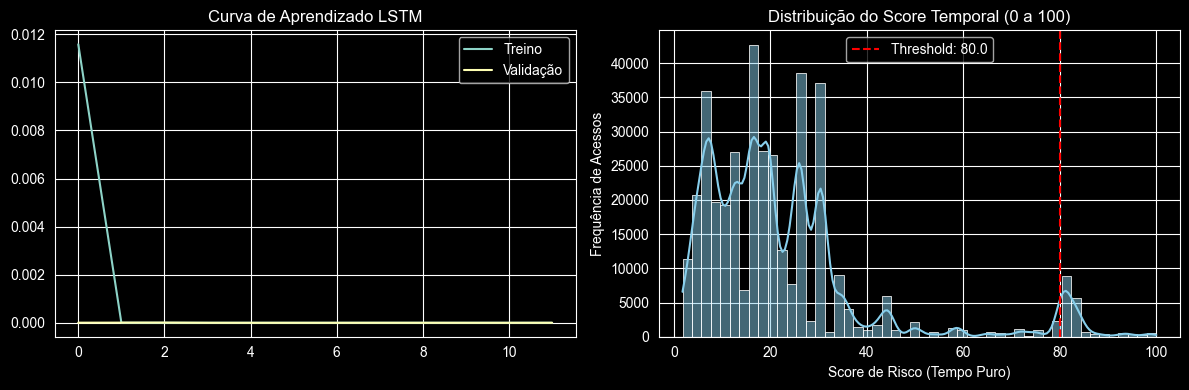

-> Limite Crítico de Comportamento (Threshold) fixado em: 80.0 / 100
Valores acima de 80 sinalizam acessos em horários/dias atípicos para o usuário.


In [ ]:
X_pred = model.predict(X, verbose=0)
scores_mse_raw = np.mean(np.power(X - X_pred, 2), axis=(1, 2))

threshold_raw = np.percentile(scores_mse_raw, 95)
max_raw = np.max(scores_mse_raw)

def escalar_score_0_a_100(score_raw, thresh_raw, maximo_raw):
    if thresh_raw == 0:
        return 100.0 if score_raw > 0 else 0.0

    if score_raw <= thresh_raw:
        return (score_raw / thresh_raw) * 80.0
    else:
        margem = maximo_raw - thresh_raw
        if margem <= 0: return 100.0
        score_extra = (score_raw - thresh_raw) / margem * 20.0
        return min(80.0 + score_extra, 100.0)

scores_100 = np.array([escalar_score_0_a_100(s, threshold_raw, max_raw) for s in scores_mse_raw])
threshold_100 = 80.0

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Aprendizado LSTM')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(scores_100, bins=50, kde=True, color='skyblue')
plt.axvline(threshold_100, color='red', linestyle='--', label=f'Threshold: {threshold_100}')
plt.title('Distribuição do Score Temporal (0 a 100)')
plt.xlabel('Score de Risco (Tempo Puro)')
plt.ylabel('Frequência de Acessos')
plt.legend()
plt.tight_layout()
plt.show()

print(f'-> Limite Crítico de Comportamento (Threshold) fixado em: {threshold_100} / 100')
print('Valores acima de 80 sinalizam acessos em horários/dias atípicos para o usuário.')

### 6.1 Identificando Quebras de Rotina Temporal Históricas
Quem são os usuários que mais acessaram fora do próprio padrão de horário no passado?

In [ ]:
resultados_anomalias = []
idx = 0

for user, group in df.groupby('Usuário'):
    n_seqs = len(group) - SEQ_LENGTH + 1
    if len(group) < SEQ_LENGTH:
        n_seqs = 1

    user_scores = scores_100[idx : idx + n_seqs]
    max_score = np.max(user_scores)

    resultados_anomalias.append({
        'Usuário': user,
        'Score_Risco_Máximo': round(max_score, 1),
        'Status': 'Anômalo' if max_score > threshold_100 else 'Normal'
    })
    idx += n_seqs

df_anomalias = pd.DataFrame(resultados_anomalias)
df_top_anomalos = df_anomalias[df_anomalias['Status'] == 'Anômalo'].sort_values(by='Score_Risco_Máximo', ascending=False)

print(f"Foram detectados {len(df_top_anomalos)} usuários com histórico de acesso classificado como ANÔMALO.")
print("Abaixo, o TOP 5 dos usuários com maior quebra de padrão cronológico:")
display(df_top_anomalos.head(5))

Foram detectados 2618 usuários com histórico de acesso classificado como ANÔMALO.
Abaixo, o TOP 5 dos usuários com maior quebra de padrão cronológico:


,Usuário,Score_Risco_Máximo,Status
4055,USR823800@acme-4cdbb9e8.org.br,100.0,Anômalo
1743,USR341895@acme-4cdbb9e8.org.br,100.0,Anômalo
631,USR124997@acme-4cdbb9e8.org.br,100.0,Anômalo
1870,USR365441@acme-4cdbb9e8.org.br,100.0,Anômalo
3602,USR728237@acme-4cdbb9e8.org.br,100.0,Anômalo


### 7. Validação de Acesso em Tempo Real (Célula de Teste Sincronizada com o Gráfico)
Esta função avalia a coordenada temporal exata. Testaremos o comportamento de `USR104683` em duas situações para provar o ajuste do modelo: às 09:00 (onde o gráfico prova ser normal) e às 03:00 (onde o gráfico prova ser vazio).

In [ ]:
def analisar_log_temporal(log_str, df_historico_raw, model, scaler, thresh_raw, maximo_raw, seq_length, features):
    # O log de exemplo usa vírgula
    novo_df = pd.read_csv(io.StringIO(log_str), names=df_historico_raw.columns, sep=',', header=None)
    usuario = novo_df['Usuário'].iloc[0]

    # Preparação Cíclica de Tempo do Novo Log
    novo_df['Data'] = pd.to_datetime(novo_df['Data'], format='mixed')
    novo_df['hour'] = novo_df['Data'].dt.hour
    novo_df['day_of_week'] = novo_df['Data'].dt.dayofweek
    novo_df['hour_sin'] = np.sin(2 * np.pi * novo_df['hour'] / 24.0)
    novo_df['hour_cos'] = np.cos(2 * np.pi * novo_df['hour'] / 24.0)
    novo_df['day_sin'] = np.sin(2 * np.pi * novo_df['day_of_week'] / 7.0)
    novo_df['day_cos'] = np.cos(2 * np.pi * novo_df['day_of_week'] / 7.0)

    # Resgatando e processando o histórico deste usuário
    historico_user = df_historico_raw[df_historico_raw['Usuário'] == usuario].sort_values(by='Data')

    if len(historico_user) == 0:
        historico_features = pd.DataFrame(columns=features)
    else:
        historico_features = historico_user.copy()
        historico_features['hour'] = pd.to_datetime(historico_features['Data']).dt.hour
        historico_features['day_of_week'] = pd.to_datetime(historico_features['Data']).dt.dayofweek
        historico_features['hour_sin'] = np.sin(2 * np.pi * historico_features['hour'] / 24.0)
        historico_features['hour_cos'] = np.cos(2 * np.pi * historico_features['hour'] / 24.0)
        historico_features['day_sin'] = np.sin(2 * np.pi * historico_features['day_of_week'] / 7.0)
        historico_features['day_cos'] = np.cos(2 * np.pi * historico_features['day_of_week'] / 7.0)

        # Pega a cauda de acordo com SEQ_LENGTH.
        # Como agora é 1, ele traz 0 histórico (tail(0)) para avaliar APENAS o momento atual isolado
        historico_features = historico_features[features].tail(seq_length - 1)

    sequencia_completa = pd.concat([historico_features, novo_df[features]])
    dados_finais = sequencia_completa.values

    if len(dados_finais) < seq_length:
        pad_size = seq_length - len(dados_finais)
        pad = np.tile(dados_finais[0], (pad_size, 1))
        dados_finais = np.vstack([pad, dados_finais])

    dados_scaled = scaler.transform(pd.DataFrame(dados_finais, columns=features))
    X_teste = dados_scaled.reshape(1, seq_length, len(features))

    pred = model.predict(X_teste, verbose=0)
    score_raw = np.mean(np.power(X_teste - pred, 2))
    score_final = escalar_score_0_a_100(score_raw, thresh_raw, maximo_raw)

    print('====== AVALIAÇÃO DE COMPORTAMENTO TEMPORAL ======')
    print(f'Usuário logado: {usuario}')
    print(f"Horário da Tentativa: {novo_df['Data'].dt.strftime('%H:%M').iloc[0]}")
    print(f'SCORE DE RISCO: {score_final:.1f} / 100')
    print(f'Limite Máximo Permitido: 80.0 / 100\n')

    if score_final > 80.0:
        print('-> RESULTADO: \033[91mFORA DO HORÁRIO USUAL (ACESSO ANÔMALO!)\033[0m')
    else:
        print('-> RESULTADO: \033[92mDENTRO DO HORÁRIO USUAL (ACESSO NORMAL)\033[0m')
    print('====================================================\n')

# ------------------------------------------------------------------------------------------------
# SIMULAÇÃO DE VERIFICAÇÃO DO AJUSTE DO MODELO
# Utilizando o usuário USR104683 que tem volume visual intenso a partir das 06:30 até 21:00.
# ------------------------------------------------------------------------------------------------

# TESTE 1: Acesso às 09:00 (Dentro da zona quente de acessos visuais - Quarta Feira)
log_teste_horario_normal = '2025-05-14T09:00:00-0300,USR104683@acme-4cdbb9e8.org.br,login_success,USR104683 logged in,none,none,Desconhecido,false,false,,acme-4cdbb9e8.org.br,São Paulo,São Paulo,Brazil,BR,5,-23.5475,-46.6361,mmdb,'
analisar_log_temporal(log_teste_horario_normal, df_base, model, scaler, threshold_raw, max_raw, SEQ_LENGTH, todas_features)

# TESTE 2: Acesso às 03:00 da madrugada (Fora da zona de acesso visual)
log_teste_horario_anomalo = '2025-05-14T03:00:00-0300,USR104683@acme-4cdbb9e8.org.br,login_success,USR104683 logged in,none,none,Desconhecido,false,false,,acme-4cdbb9e8.org.br,São Paulo,São Paulo,Brazil,BR,5,-23.5475,-46.6361,mmdb,'
analisar_log_temporal(log_teste_horario_anomalo, df_base, model, scaler, threshold_raw, max_raw, SEQ_LENGTH, todas_features)

====== AVALIAÇÃO DE COMPORTAMENTO TEMPORAL ======
Usuário logado: USR104683@acme-4cdbb9e8.org.br
Horário da Tentativa: 09:00
SCORE DE RISCO: 19.6 / 100
Limite Máximo Permitido: 80.0 / 100

-> RESULTADO: DENTRO DO HORÁRIO USUAL (ACESSO NORMAL)

====== AVALIAÇÃO DE COMPORTAMENTO TEMPORAL ======
Usuário logado: USR104683@acme-4cdbb9e8.org.br
Horário da Tentativa: 03:00
SCORE DE RISCO: 84.0 / 100
Limite Máximo Permitido: 80.0 / 100

-> RESULTADO: FORA DO HORÁRIO USUAL (ACESSO ANÔMALO!)



### 8. Análise Visual de Hábitos de um Usuário Específico
Esta ferramenta plota visualmente o comportamento histórico de acessos de um determinado usuário em um ciclo de 24 horas. É excelente para uma análise humana rápida em caso de auditoria.

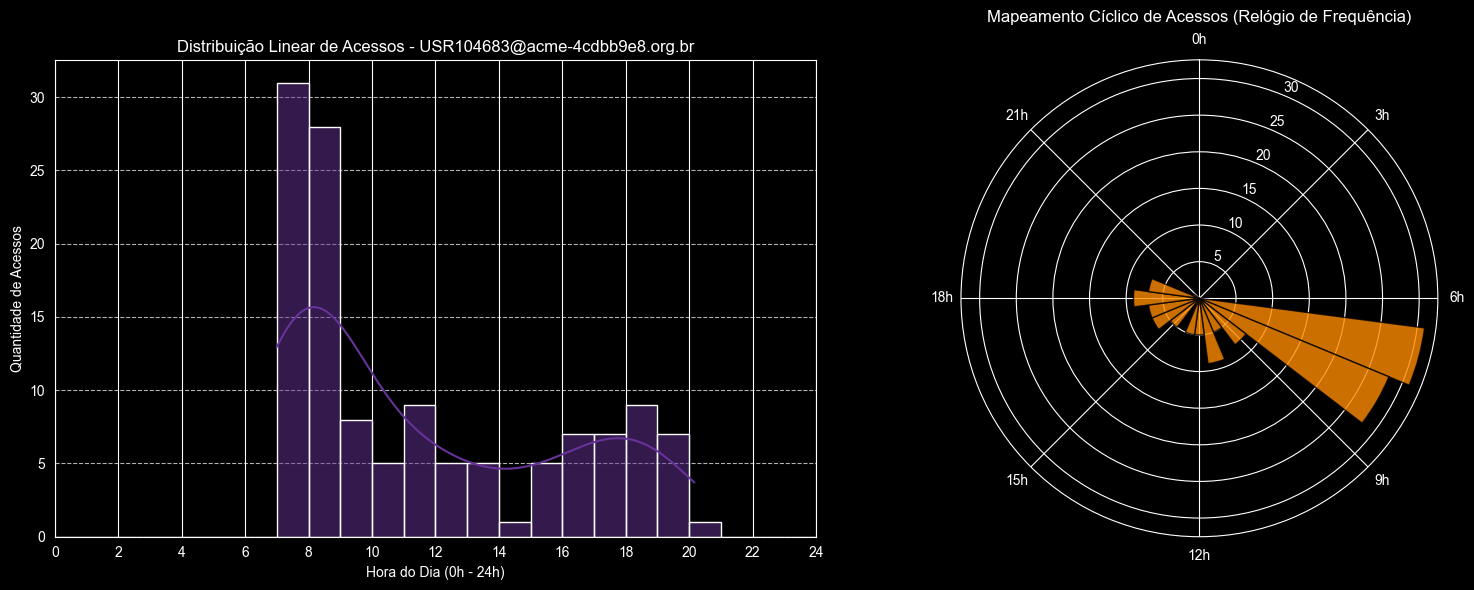

Total de acessos analisados para USR104683@acme-4cdbb9e8.org.br: 128 logs.


In [ ]:
def visualizar_habitos_usuario(usuario_alvo, df_raw):
    # Extraindo todo o histórico de acessos do usuário
    df_user = df_raw[df_raw['Usuário'] == usuario_alvo].copy()

    if len(df_user) == 0:
        print(f"O usuário '{usuario_alvo}' não foi encontrado na base de dados.")
        return

    # Prepara a data para extrair as horas fracionadas (ex: 14:30 vira 14.5)
    df_user['Data'] = pd.to_datetime(df_user['Data'], format='mixed')
    df_user['Hora_Fracionada'] = df_user['Data'].dt.hour + (df_user['Data'].dt.minute / 60.0)

    fig = plt.figure(figsize=(16, 6))

    # --- 1. Gráfico Linear (Histograma 24h) ---
    ax1 = plt.subplot(1, 2, 1)
    sns.histplot(df_user['Hora_Fracionada'], bins=24, binrange=(0, 24), kde=True, color='rebeccapurple', ax=ax1)
    ax1.set_xticks(range(0, 25, 2))
    ax1.set_xlim(0, 24)
    ax1.set_title(f'Distribuição Linear de Acessos - {usuario_alvo}')
    ax1.set_xlabel('Hora do Dia (0h - 24h)')
    ax1.set_ylabel('Quantidade de Acessos')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # --- 2. Gráfico Polar (Relógio Cíclico) ---
    # Este gráfico imita o aprendizado matemático da rede neural
    ax2 = plt.subplot(1, 2, 2, projection='polar')

    # Converte as horas (0-24) para ângulos em radianos (0 - 2π)
    theta = (df_user['Hora_Fracionada'] / 24.0) * 2 * np.pi
    bins = np.linspace(0, 2*np.pi, 25)
    radii, _ = np.histogram(theta, bins=bins)
    width = (2 * np.pi) / 24

    bars = ax2.bar(bins[:-1], radii, width=width, bottom=0.0, color='darkorange', alpha=0.8, edgecolor='black')

    # Configurando o layout para parecer um relógio (0h no topo, girando no sentido horário)
    ax2.set_theta_zero_location("N")
    ax2.set_theta_direction(-1)

    # Adicionando os marcadores de horas do relógio
    ax2.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
    ax2.set_xticklabels(['0h', '3h', '6h', '9h', '12h', '15h', '18h', '21h'])
    ax2.set_title('Mapeamento Cíclico de Acessos (Relógio de Frequência)', va='bottom')

    plt.tight_layout()
    plt.show()
    print(f"Total de acessos analisados para {usuario_alvo}: {len(df_user)} logs.")

# ------------------------------------------------------------------------------------------------
# INSERIR VARIÁVEL DO USUÁRIO AQUI
# Teste com o usuário solicitado para visualizar seu padrão em 24 horas
# ------------------------------------------------------------------------------------------------
usuario_exemplo = 'USR104683@acme-4cdbb9e8.org.br'
visualizar_habitos_usuario(usuario_exemplo, df_base)